# Introduction to Data Science
## Lab 4: Further aspects of linear regression

### Part A - Limitations of the t-test

In this notebook, we investigate the limitations of a single-variable **t-test** for the predictor coefficients $\beta$ in a linear regression setting.
Recall the following statements from the lecture (Slide 38 in 03_IntroDS_Regression.pdf):
* Does a single small $p$-value indicate at least one variable relevant? No.
* Example: $p=100$, $H_0 : \beta_1 = \dots = \beta_p = 0$ true. Then by chance, $5\%$ of $p$-values below $0.05$. Almost guaranteed that $p<0.05$ for at least one variable by chance.
* Thus, for large $p$, looking only at $p$-values of individual $t$-statistics tends to discover spurious relationships.

In what follows, we use slightly different values than in the above mentioned example, setting $n = 100$ and $p = 20$.

In [2]:
import numpy as np

# Set parameters n (number of training samples) and p (number of predictor variables)
n = 100
p = 20

For this purpose, we generate random uncorrelated input and output vectors.

**Task**: Write the function `drawSample` that generates **uniformly distributed** arrays of random variables
* $X$ should be of size (n, p+1) with values in $[0,1]$; the first column is reserved for the intercept and should contain a only ones
* $y$ should be of size (n,) with values in $[-0.5,0.5]$

In [3]:
def drawSample(n,p):
    """ This function draws a
    sample for our experiment. """
    
    A=np.random.uniform(0, 1, size= (n, p))
    X=np.insert(A, obj=0, values=1, axis=1)
    
    y=np.random.uniform(-0.5, 0.5, size= (n,))
    
    return (X,y)

In [4]:
assert drawSample(40,4)[0].shape == (40,5), 'Wrong shape of X'
assert drawSample(40,4)[1].shape == (40,), 'Wrong shape of y'
assert all(drawSample(40,4)[0][:,0]==1), 'Check the first column of X'
assert drawSample(40,4)[1].min() > -0.5 and drawSample(40,4)[1].max() < 0.5, 'Wrong range of y'
assert drawSample(40,4)[0].min() > 0 and drawSample(40,4)[0].max() <= 1, 'Wrong range of X'

The following function computes single-variable t-statistics for the model
$$ y \approx X \beta $$
whose parameters $\beta \in \mathbb{R}^{p+1}$ are estimated via
$$ \hat \beta = (X^\top X)^{-1} X^\top y. $$

In [5]:
from scipy.stats import t

def printTStatistic(X, y, p_threshold = 0.10, print_table=True):
    n, m = X.shape
    p = m - 1

    # Invert X^T * X
    V = np.linalg.inv((X.T).dot(X))
    

    # Compute regression coefficients beta
    beta = V.dot( X.T.dot(y) )

    # Extract diagonal of matrix (X^T * X)^-1
    v = V.diagonal()

    # Predict y using beta
    y_pred = X.dot(beta)

    # Compute estimate of sigma
    sigma_hat = np.sqrt( 1./(n-p-1) * np.power(y - y_pred,2).sum() )

    # Compute the standard errors
    SE = np.sqrt(v) * sigma_hat

    # Compute the values of the t-statistic
    t_vals = beta / SE

    # Compute the corresponding p values
    p_vals = 2*t.cdf(-np.absolute(t_vals), n-p-1)

    if print_table:
        
        # Print header
        print('|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < %4.2f |' % p_threshold)
        print('----------------------------------------------------------------------------')
        
        # Print 
        for i in range(p+1):
            pval = p_vals[i]
            if pval < 0.0001:
                pval_str = '< 0.0001'
            else:
                pval_str = '  %5.4f' % pval
            print('|    beta_%02d    |  %6.3f  |  %6.4f  |    %5.2f    | %s  |     %d    |' % (i, beta[i], SE[i], t_vals[i], pval_str, pval < p_threshold))
            
    return ((p_vals < p_threshold).sum())/(p+1)

**Task**: Test the function `printTStatistic` using an example drawn with your function `drawSample`.

In [6]:
X, y = drawSample(n,p)
printTStatistic(X,y)

|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < 0.10 |
----------------------------------------------------------------------------
|    beta_00    |   0.206  |  0.2131  |     0.97    |   0.3372  |     0    |
|    beta_01    |  -0.054  |  0.1097  |    -0.49    |   0.6270  |     0    |
|    beta_02    |   0.088  |  0.1173  |     0.75    |   0.4531  |     0    |
|    beta_03    |  -0.013  |  0.1025  |    -0.12    |   0.9020  |     0    |
|    beta_04    |  -0.151  |  0.1235  |    -1.23    |   0.2239  |     0    |
|    beta_05    |  -0.078  |  0.1141  |    -0.69    |   0.4941  |     0    |
|    beta_06    |   0.122  |  0.1089  |     1.12    |   0.2645  |     0    |
|    beta_07    |  -0.108  |  0.1061  |    -1.02    |   0.3128  |     0    |
|    beta_08    |  -0.146  |  0.1117  |    -1.30    |   0.1966  |     0    |
|    beta_09    |   0.213  |  0.1108  |     1.92    |   0.0585  |     1    |
|    beta_10    |  -0.088  |  0.1082  |    -0.82    |   0.4174  |     0    |

0.09523809523809523

Now, we want to find out, how many predictor variables are statistically significant for a threshold of $0.10$ in our setting with `n = 100` and `p = 20`.

**Task**: Expand the function `printTStatistic` from above. It should **return the proportion of significant predictor variables** at a certain threshold `p_threshold`. Test it using the example below; execute the next cell multiple times (by hitting `Ctrl + Enter`).

In [7]:
printTStatistic(X,y, 0.01)

|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < 0.01 |
----------------------------------------------------------------------------
|    beta_00    |   0.206  |  0.2131  |     0.97    |   0.3372  |     0    |
|    beta_01    |  -0.054  |  0.1097  |    -0.49    |   0.6270  |     0    |
|    beta_02    |   0.088  |  0.1173  |     0.75    |   0.4531  |     0    |
|    beta_03    |  -0.013  |  0.1025  |    -0.12    |   0.9020  |     0    |
|    beta_04    |  -0.151  |  0.1235  |    -1.23    |   0.2239  |     0    |
|    beta_05    |  -0.078  |  0.1141  |    -0.69    |   0.4941  |     0    |
|    beta_06    |   0.122  |  0.1089  |     1.12    |   0.2645  |     0    |
|    beta_07    |  -0.108  |  0.1061  |    -1.02    |   0.3128  |     0    |
|    beta_08    |  -0.146  |  0.1117  |    -1.30    |   0.1966  |     0    |
|    beta_09    |   0.213  |  0.1108  |     1.92    |   0.0585  |     0    |
|    beta_10    |  -0.088  |  0.1082  |    -0.82    |   0.4174  |     0    |

0.0

**Task**: Write a small script that carries out the experiment `1000` times and computes the mean proportion of significant values in our experiment. It should be around `p_threshold`.

**Hint 1**: Use the keyword argument `print_table` to suppress the printing of the tables.

**Hint 2**: You can collect the returned values in a list initialized by `vals = []`. You can append a new value `new_val` using `vals.append(new_val)`.

In [8]:
def mean_proportion_of_significant_values(n=1000, p= 20, p_threshold=0.05):
    vals =[]
    for i in range(n):
        X, y = drawSample(n,p)
        new_val = printTStatistic(X,y, p_threshold,False)
        vals.append(new_val)

    return np.mean(vals)

mean_proportion_of_significant_values()

0.05114285714285714

In [9]:
mean_proportion_of_significant_values(3000,20,0.01)

0.010396825396825397

### Part B: "Nonlinear" linear regression

The goal of this problem is to approximate given data points $(x_i,y_i)$ for $i=1,\ldots,n$ by polynomials of degree $p$.
This can be done by solving the linear regression problem:

$$
 y_i \approx \beta_0 + \beta_1 \, x_i + \beta_2 \, x_i^2 + \ldots + \beta_p \, x_i^p
$$

By splitting our data into a training and test data set, we want to illustrate graphically the problem of overfitting.

**Task**: Define the 'unknown' function

$$
f(x) = \sin(10 \, x) + 5 \, \cos(3 \, x)
$$

using `numpy`.

In [10]:
import numpy as np

# Define the 'unknown' function f
def f(x):
    return np.sin(10*x)+5*np.cos(3*x)

In [11]:
assert(np.abs(f(np.pi)+5) < 1e-8)
assert(np.abs(f(np.pi/2)) < 1e-8)
assert(np.abs(f(0)-5) < 1e-8)
assert(np.abs(f(2) - 5.71) < 1e-2)

**Task**: Generate a uniformly distributed random vector `x` of size `n = 200`.

In [12]:
# Set random seed to make random variables 'predictable'
np.random.seed(0)

# Generate uniformly distributed data samples over [0,1)
n=200
x = np.random.rand(n)

In [13]:
assert n == 200
assert np.abs(x.mean() - 0.5004377979051402) < 1e-8
assert x.shape == (200,)

**Task**: Determine the vector `y` in the following way

$$
y_i = f(x_i) + \varepsilon \, \eta_i
$$

with $\eta_i$ standard-normal distributed and $\varepsilon = 1$.

In [14]:
mu, sigma = 0,1 # mean and standard deviation
eta = np.random.normal(mu, sigma, n)
epsilon=1
y=f(x)+epsilon*eta

In [15]:
assert y.shape == (200,)
assert np.abs(y.mean() - 0.2748887916140714) < 1e-8

**Task**: Generate one figure with the following data:
* mark the **data points** $(x_i,y_i)$ as black circles
* draw the **population line** (the line representing the *unknown* function $f$) as a red solid line
* draw the **regression line** for a fitted polynomial with polynomial degree `p = 20` as a blue dashed line

**Hint**: Use the functions `np.polyfit` and `np.polyval` to determine the regression line.

C:\Users\Sam Modabber\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


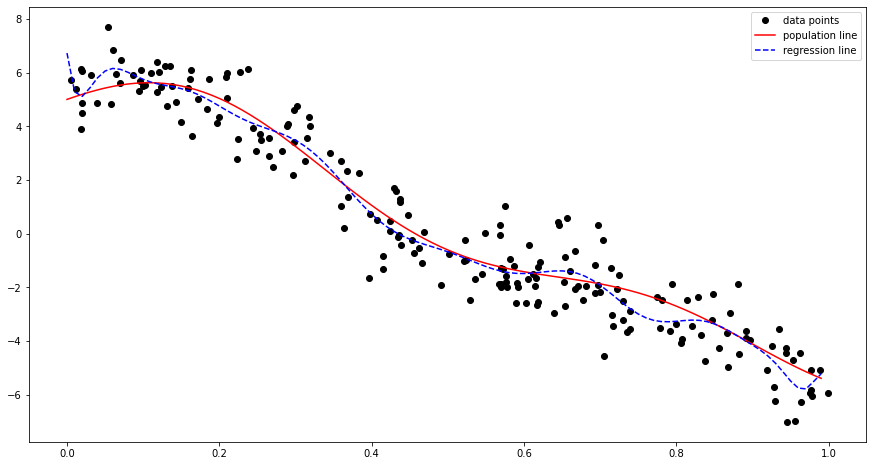

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

fig = plt.figure(1, clear = True)

plt.plot(x,y,'ko', label='data points');

t = np.arange(0,1,0.01)
plt.plot(t,f(t), 'r-', label='population line');


P = np.polyfit(x,y,20)

plt.plot(t,np.polyval(P,t),'b--', label='regression line');

plt.legend();


Split the dataset $(x,y)$ into a training and test set using `np.split`
- the training set should contain `ntrain` samples
- the test set should contain `n - ntrain` samples

Choose `ntrain = 80`.

In [17]:
ntrain = 80
xtrain, xtest = np.split(x, [ntrain])
ytrain, ytest = np.split(y,[ntrain])
np.concatenate((xtrain,xtest)).mean()==x.mean()

True

In [18]:
assert(ntrain == 80)
assert(xtrain.shape == (80,))
assert(xtest.shape == (120,))
assert(ytrain.shape == (80,))
assert(ytest.shape == (120,))
assert np.hstack((xtrain,xtest)).mean() == x.mean()

Now we want to fit polynomial models with varying polynomial degrees ($p= 0,\ldots,20$).
As a quality measure, we store the training MSE (mean squared error) and the test MSE.

**Note**: You can ignore the `RankWarning`s!

In [19]:
def computeMSE(y, fhatx):
    " This function returns the mean squared error between x and y."
    return np.mean(np.power(y-fhatx,2))

# Initialize lists that contain test and training mean squared errors
MSEtrain = []
MSEtest = []

# Set range for different degrees
deg_range = np.arange(0,21)

for j in deg_range:
    
    # Fit polynomial of degree 'j' on training data
    p = np.polyfit(x,y,j)
    
    # Append test and training mse to according list
    fhat_xtrain = np.polyval(p,xtrain)
    MSEtrain.append(computeMSE(ytrain,fhat_xtrain))
    
    fhat_xtest = np.polyval(p,xtest)
    MSEtest.append(computeMSE(ytest,fhat_xtest))
    

C:\Users\Sam Modabber\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Sam Modabber\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


**Task**: Generate one figure that contains
- the test mse in a logarithmic plot as a blue dashed line
- the training mse in a logarthmic plot as a red solid line

against the polynomial degree.
You should use the function `plt.semilogy` and set meaningful `label`s.

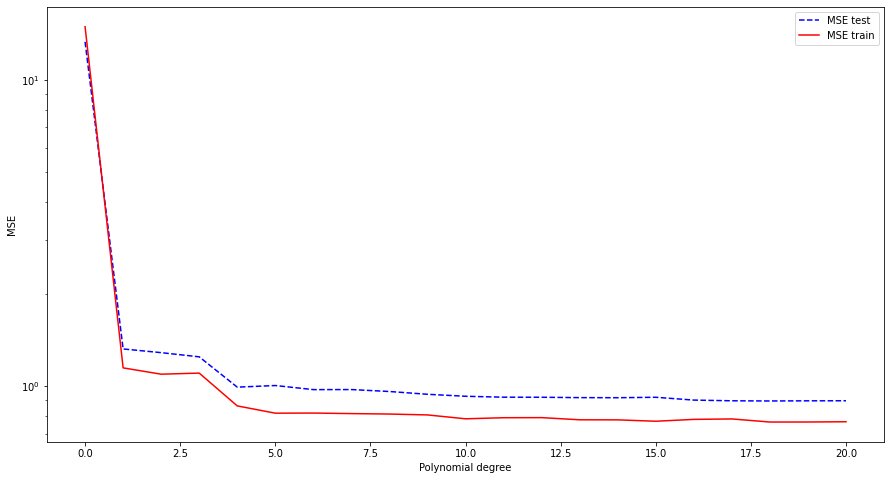

In [20]:
fig = plt.figure(2, clear=True)

plt.semilogy(deg_range,MSEtest, 'b--', label = 'MSE test')
plt.semilogy(deg_range,MSEtrain, 'r-', label = 'MSE train')

plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")


plt.show()